# SVM
C越小, regularization越強  
C : float, default: 1.0  
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.  

SVC: probability=True  
可輸出機率  
print(model.predict_proba(X))


對於logistic regression是用GD往likelihood的最大值前進  
對於Linear SVM是往Margin的最大值前進  
假設該資料集非線性可分, 引入$\xi$ 增加容錯來幫助分對  
SVM導入Kernel的觀念, 將training data的維度升高(製造高維, $\phi_0,...\phi_n$),  
透過刻意升高維度讓原本難分類的資料, 變得好分類
原本training data的維度升高計算變得複雜,  
使用特別的kernel, kernel trick使計算變得簡化許多

定義一個hyperplane  
$w^Tx+b=0$  
假設我們以$f(x) = sgn(w^Tx+b)$當作分類的分式  
$w^Tx+b\geq 1$ if $y_i = 1$  
$w^Tx+b\leq -1$ if   $y_i = -1$  


計算Margin  
給定兩個parallel  
$w^Tx=b_1$  
$w^Tx=b_2$
distance:
$=\frac{|b_1-b_2|}{||w||_2}$  

所以Marge $=\frac{2}{\sqrt{w^Tw}}$  
求最大值 $w:=arg~max_w \frac{2}{\sqrt{w^Tw}}$  
等同於求最小值  $w:=arg~min_w \frac{\sqrt{w^Tw}}{2}$  
等同於求最小值  $w:=arg~min_w \frac{1}{2}w^Tw$  
限制條件(分對的條件):  
Subject to $y_i(w^Tx_i+b) \geq 1 $ 對每一個i

### 若資料集非線性可分, 引入penalty
$min_w \frac{1}{2}w^Tw + C\sum_{i=1}^n \xi_i$  
Subject to  
$y_i(w^Tx_i+b)\geq 1-\xi_i$, 這裡$\xi$是一個正值, C也是一個正值(Regularization Parameter)  

稱之為**soft margin classification**  
soft margin:
  - 因為資料有可能線性不可分
  - 就算資料線性可分, 有時候增加容錯可以得到更大的Margin

C控制overfitting  
C越大使得$\xi$越小, 越不容錯  



重新整裡一下  
$min_w \frac{1}{2}w^Tw + C\sum_{i=1}^n \xi_i$  
Subject to  
$y_i(w^Tx_i+b)\geq 1-\xi_i$  
因為有限制條件, 所以無法直接用Gradient Decend求最佳解w  

改寫成如下  

$min_w \frac{1}{2}w^Tw + C\sum_{i=1}^n max[0, 1-y_i(w^Tx_i+b)]$ 

因為分對邊的話$y_i(w^Tx_i+b) \geq 1$  
$max[0,1-y_i(w^Tx_i+b)]$ 會取最大值0 , 表示$\xi=0$ [分對=0]  
分錯邊的話$y_i(w^Tx_i+b) < 1$  會取最大值$1-y_i(w^Tx_i+b)$ , 表示$\xi$有誤差存在  

改寫成這樣就能用GD了  
$f(w,b)=\frac{1}{2}w^Tw+C\sum_{i=1}^n max[0,1-y_i(w^Tx_i+b)]$  
$\triangledown_{w_j}f = w_j + C\sum_{i=1}^n\frac{\partial~max[0,1-y_i(w^Tx_i+b)]}{\partial w_j}$  
$ \frac{\partial~max[0,1-y_i(w^Tx_i+b)]}{\partial w_j} = 0$ if $y_i(w^Tx_i+b) \geq 1$  
$ \frac{\partial~max[0,1-y_i(w^Tx_i+b)]}{\partial w_j} = -y_ix_{ij}$ else  

所以   
$\begin{aligned}
\triangledown_{w_j}f =& w_j~~~~~~~~~~~~~~~~~~~~~~~~~~~if~y_i(w^Tx_i+b) \geq 1 \\ 
 &w_j +C\sum_{i=1}^n(-y_ix_{ij})~~~~~~else  \\
\end{aligned}$



### Solve Linear SVM by Gradient Descent  
假設有d維  
$
\begin{aligned}
&while~(true) \lbrace \\
&~~for~(j=1,2,....d)~\lbrace \\
&~~~~\triangledown_{w_j}f(x_{1:n}) = w_j + C\sum_{i=1}^n\frac{\partial~max[0,1-y_i(w^Tx_i+b)]}{\partial w_j}  \\
&~~~~w_j = w_j - \alpha \triangledown_{w_j}f \\
&~~~\rbrace \\
&~~~if~(w~converges)~break \\
&\rbrace \\
\end{aligned}
$  
### Solve Linear SVM by Stochastic Gradient Descent  
$
\begin{aligned}
&while~(true) \lbrace \\
&~~~for~(i=1,2,....n)~\lbrace \\
&~~~~~~for~(j=1,2,....d)~\lbrace \\
&~~~~~~~~~\triangledown_{w_j}f(x_i) = w_j + C\frac{\partial~max[0,1-y_i(w^Tx_i+b)]}{\partial w_j}  \\
&~~~~~~~~~w_j = w_j - \alpha \triangledown_{w_j}f \\
&~~~~~~\rbrace \\
&~~\rbrace \\
&~~if~(w~converges)~break \\
&\rbrace \\
\end{aligned}
$  

### Kernel SVM  
Map features to higher dimension  
ex:  
X有$(x_1,x_2)$兩個維度  
我們可以新增一個維度$x_3=x_1^2+x_2^2$  
$\phi (x_1,x_2) = (x_1,x_2,x_1^2+x_2^2)$  

為了簡化問題, 這裡先省略$\xi$部分  
$min_w \frac{1}{2}w^Tw$  
Subject to  
$y_i(w^T\phi(x_i)+b)\geq 1$  
在linear SVM中w的維度跟$x_i$都是d維  
在kernel SVM中w的維度跟$\phi (x_i)$都大於d維(可能無限維度)  
- 如果w無限維度, 在電腦中如何儲存?  
- 如果w無限維度, $w^T\phi(x_i)$ 如何更有效率的計算?  








### Generalized Lagrangian

Generalized Lagrangian:  
Minimize f(x)  
subject to  
g(x) $\leq$ 0 (i=1,...,p) and  
h(x) = 0 (j=1,...,m)  
- Lagrangian  
$\mathcal{L}(x,\lambda,\mu)$  
$ = f(x) + \sum_{i=1}^p\lambda_ig_i(x) + \sum_{j=1}^m\mu_jh_j(x)$  

### KKT Condition
KKT. 

### Lagrangian and SVM  

Lagrangian and SVM:  
Minimize $\frac{1}{2}w^Tw$
subject to  
$1-y_i(w^T\phi(x_i)+b)\leq 0$ 
- Lagrangian  
$\mathcal{L}(w,b,\lambda)$  
$ = \frac{1}{2}w^Tw + \sum \lambda_i[1-y_i(w^T\phi(x_i)+b)]$  

### Solve SVM by Lagrangian  
$\mathcal{L}(w,b,\lambda) = \frac{1}{2}w^Tw + \sum \lambda_i[1-y_i(w^T\phi(x_i)+b)]$  
偏微分令:=0  
$\triangledown_w\mathcal{L}(w,b,\lambda) = w -  \sum \lambda_i[y_i(\phi(x_i))] :=0$  
$\triangledown_b\mathcal{L}(w,b,\lambda) = - \sum \lambda_i[y_i(1)] :=0$  
上兩式可得:  
$w = \sum \lambda_iy_i\phi(x_i)$  
且$\sum \lambda_iy_i=0$  

所以如果有一筆test sample, $x_t$  
$f(x_t) = w^T\phi (x_t)+b = \sum \lambda_iy_i\phi(x_i)^T\phi (x_t)+b $  
ex:  
$x_i = [x_{i1},x_{i2}]^T \in R^2$, $\phi (x_i) \in R^6$  
if we set $\phi(x_i) = [1,\sqrt2x_{i1},\sqrt2x_{i2},\sqrt2x_{i1}x_{i2},x_{i1}^2,x_{i2}^2]^T$  
Then $\phi (x_i)^T\phi (x_t) = 1 + x_{i1}^2x_{t1}^2 + x_{i2}^2x_{t2}^2 + \sqrt2x_{i1}x_{t1}+ \sqrt2x_{i2}x_{t2} + \sqrt2x_{i1}x_{t1}x_{i2}x_{t2}$  
不好計算, 複雜度高  


### Kernel Trick 
假設函數$\phi(x_i)$  
$\phi(x_i) = [1,\sqrt2x_{i1},\sqrt2x_{i2},\sqrt2x_{i1}x_{i2},x_{i1}^2,x_{i2}^2]^T$  
相乘可以簡化為   
$\phi (x_i)^T\phi (x_t) = (1+x_i^Tx_T)^2$  

$f(x_t) = w^T\phi (x_t)+b = \sum \lambda_iy_i\phi(x_i)^T\phi (x_t)+b $  
$ = \sum \lambda_iy_i[(1+x_i^Tx_t)^2]+b $  

導入Kernel概念  
$f(x_t) = w^T\phi (x_t)+b = \sum \lambda_iy_iK(x_i,x_t)+b $  
- Linear kernel (linear SVM):  
$K(x_i,x_t) = x_i^Tx_t = <x_i,x_t>$  
- Polynomial kernel (linear SVM):  
$K(x_i,x_t) = (<x_i,x_t>+\gamma)^d$, $\gamma > 0 $  
- Gaussian (RBF) kernel:  
$K(x_i,x_t) = e^{-\gamma||x_i-x_t||^2} $  

RBF Kernel maps $x_i$ to infinite dimension:  
Assume $x_i \in R^1, \gamma > 0$  
$e^{-\gamma||x_i-x_j||^2} = e^{-\gamma (x_i-x_j)^2} = exp(-\gamma x_i^2+2\gamma x_ix_j-\gamma x_j^2 )$  
$exp(-\gamma x_i^2-\gamma x_j^2 )*exp(2\gamma x_ix_j)$ 

**By Taylor exansion:**  
$e^x = \sum_{i=0}^\infty\frac{x^i}{i!}$  


$exp(-\gamma x_i^2-\gamma x_j^2 )*exp(2\gamma x_ix_j)$  
$= exp(-\gamma x_i^2-\gamma x_j^2 )*\sum_{n=0}^\infty\frac{2 \gamma x_ix_j^n}{n!}$  
$= exp(-\gamma x_i^2-\gamma x_j^2 )*(1+\frac{(2 \gamma x_ix_j)^1}{1!}+\frac{(2 \gamma x_ix_j)^2}{2!}+...)$  
$= exp(-\gamma x_i^2-\gamma x_j^2 )*(1*1+\sqrt{\frac{(2\gamma)}{1!}}x_i\sqrt{\frac{(2\gamma)}{1!}}x_j+\sqrt{\frac{(2\gamma)^2}{2!}}x_i^2\sqrt{\frac{(2\gamma)^2}{2!}}x_j^2+...)$  
$= \phi(x_i)\phi(x_j)$  
所以  
$\phi(x_t) = exp(-\gamma x_t^2)[1,\sqrt{\frac{(2\gamma)^1}{1!}}x_t^1]^T,\sqrt{\frac{(2\gamma)^2}{2!}}x_t^2,...]$






### $\lambda$ 與計算$K(x_i,x_t)$

對於給一筆test sample預測  
$f(x_t) = w^T\phi (x_t)+b = \sum \lambda_iy_iK(x_i,x_t)+b $  
其實要拿每一筆train sample $x_i$,  
計算$\lambda_iy_iK(x_i,x_t)$  
但實際上$\lambda_i$大部分是0 (KKT Condition)  
$\lambda_i$是Lagrangian的參數  
實際只需要計算$\lambda_i > 0$的部分  

我們把$\lambda_i > 0$的那些$x_i$叫做**Support Vector**. 

### Solve Kernel SVM by Stochastic Gradient Descent?  

$\triangledown_w\mathcal{L}(w,b,\lambda) = w -  \sum \lambda_i[y_i(\phi(x_i))] :=0$  
$\triangledown_b\mathcal{L}(w,b,\lambda) = - \sum \lambda_i[y_i(1)] :=0$  


$
\begin{aligned}
&while~(true) \lbrace \\
&~~~for~(i=1,2,....n)~\lbrace \\
&~~~~~~for~(j=1,2,....d)~\lbrace \\
&~~~~~~~~~\triangledown_{w_j}f(x_i) = w_j + C\frac{\partial~max[0,1-y_i(w^T\phi(x_i)+b)]}{\partial w_j} \\
&~~~~~~~~~w_j = w_j - \alpha \triangledown_{w_j}f \\
&~~~~~~\rbrace \\
&~~\rbrace \\
&~~if~(w~converges)~break \\
&\rbrace \\
\end{aligned}
$  

=========================  

以RBF來說  
$\phi(x_i) = exp(-\gamma x_i^2)[1,\sqrt{\frac{(2\gamma)^1}{1!}}x_i^1]^T,\sqrt{\frac{(2\gamma)^2}{2!}}x_i^2,...]$  

=========================  


### Kernel Compare
linear  
poly  
rbf  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn import metrics
from myfun import plot_decision_regions
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[9.63171309e-01 2.17376179e-02 1.50910732e-02]
 [8.60113506e-01 1.05099322e-01 3.47871723e-02]
 [9.81715252e-01 1.18060245e-02 6.47872309e-03]
 [9.82274179e-01 1.19038457e-02 5.82197570e-03]
 [9.87463385e-01 6.36867854e-03 6.16793639e-03]
 [9.71903001e-01 1.30831852e-02 1.50138137e-02]
 [9.96099271e-01 2.09897246e-03 1.80175624e-03]
 [9.66239461e-01 2.03388417e-02 1.34216970e-02]
 [9.83181105e-01 1.20710055e-02 4.74788941e-03]
 [9.10403729e-01 6.44007662e-02 2.51955050e-02]
 [9.30842611e-01 3.74270979e-02 3.17302911e-02]
 [9.88550658e-01 6.55177461e-03 4.89756698e-03]
 [9.14841396e-01 6.30380741e-02 2.21205295e-02]
 [9.94198550e-01 3.82899686e-03 1.97245338e-03]
 [8.71306640e-01 5.77508102e-02 7.09425498e-02]
 [9.85600067e-01 4.51259840e-03 9.88733510e-03]
 [9.71903001e-01 1.30831852e-02 1.50138137e-02]
 [9.63171309e-01 2.17376179e-02 1.50910732e-02]
 [8.14393865e-01 9.62809139e-02 8.93252211e-02]
 [9.91813842e-01 3.48072946e-03 4.70542883e-03]
 [7.52918160e-01 1.61416456e-01 8.566538

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

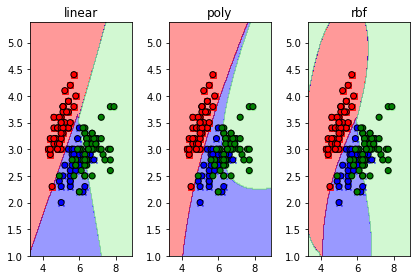

In [6]:
data = load_iris()
# we only take the first two features.
X = data.data[:,:2]
y = data.target
colors='rbg'
color=[ colors[i] for i in y ]

plt.subplot(131)
plt.tight_layout()
model = svm.SVC(kernel='linear', probability=True, C=1)
model.fit(X,y)
predicted = model.predict(X)
plot_decision_regions(X, y, model)
plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
plt.title('linear')

plt.subplot(132) 
plt.tight_layout()
model = svm.SVC(kernel='poly', C=1, degree=3,gamma=0.7)
model.fit(X,y)
predicted = model.predict(X)
plot_decision_regions(X, y, model)
plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
plt.title('poly')
plt.subplot(133)
plt.tight_layout()
model = svm.SVC(kernel='rbf', C=1, gamma=0.7)
model.fit(X,y)
predicted = model.predict(X)
plot_decision_regions(X, y, model)
plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
plt.title('rbf')
plt.show()



# C in Linear SVM

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

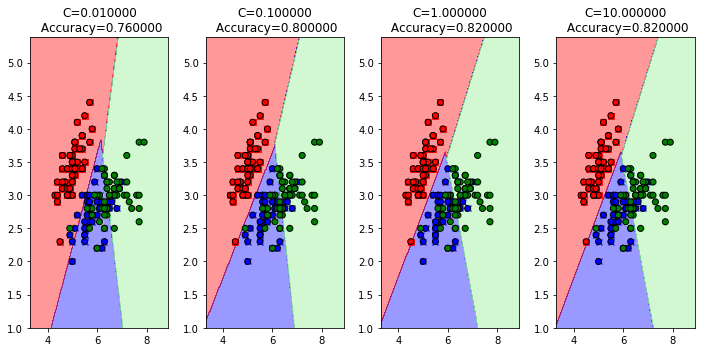

In [3]:
rcParams['figure.figsize'] = 10, 5
def linear_svm_different_c(drawflag, X, y, c):
    plt.subplot(drawflag) 
    plt.tight_layout()
    colors='rbg'
    #model = svm.SVC(kernel='linear', C=c)
    model = svm.SVC(kernel='linear', C=c, degree=3, gamma=0.7)
    model.fit(X,y)
    predicted = model.predict(X)
    accuracy = model.score(X,y)
    plot_decision_regions(X, y, model)
    plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('C=%f'%c+'\n Accuracy=%f'%accuracy)
linear_svm_different_c(141,X,y,0.01)
linear_svm_different_c(142,X,y,0.1)
linear_svm_different_c(143,X,y,1)
linear_svm_different_c(144,X,y,10)
plt.show()

# C in polynominal SVM

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

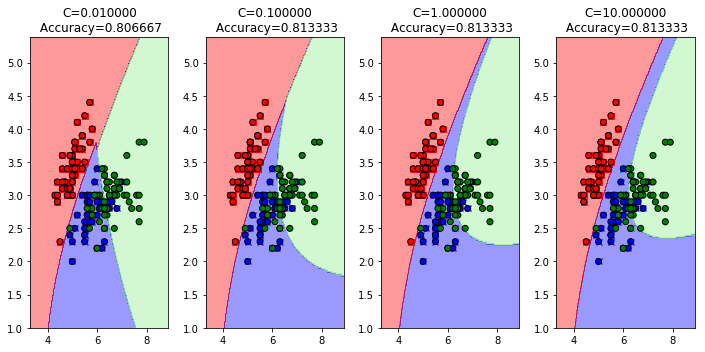

In [4]:
rcParams['figure.figsize'] = 10, 5
def poly_svm_different_c(drawflag, X, y, c):
    plt.subplot(drawflag) 
    plt.tight_layout()
    colors='rbg'
    #model = svm.SVC(kernel='linear', C=c)
    model = svm.SVC(kernel='poly', C=c, degree=3, gamma=0.7)
    model.fit(X,y)
    predicted = model.predict(X)
    accuracy = model.score(X,y)
    plot_decision_regions(X, y, model)
    plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('C=%f'%c+'\n Accuracy=%f'%accuracy)
poly_svm_different_c(141,X,y,0.01)
poly_svm_different_c(142,X,y,0.1)
poly_svm_different_c(143,X,y,1)
poly_svm_different_c(144,X,y,10)
plt.show()

# C in rbf SVM

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

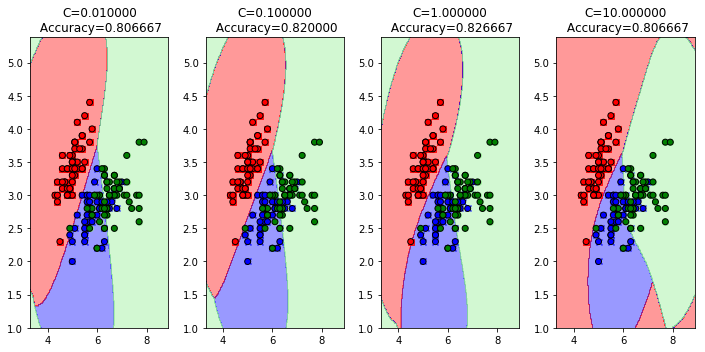

In [5]:
rcParams['figure.figsize'] = 10, 5
def rbf_svm_different_c(drawflag, X, y, c):
    plt.subplot(drawflag) 
    plt.tight_layout()
    colors='rbg'
    #model = svm.SVC(kernel='linear', C=c)
    model = svm.SVC(kernel='rbf', C=c, gamma=0.7)
    model.fit(X,y)
    predicted = model.predict(X)
    accuracy = model.score(X,y)
    plot_decision_regions(X, y, model)
    plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('C=%f'%c+'\n Accuracy=%f'%accuracy)
rbf_svm_different_c(141,X,y,0.01)
rbf_svm_different_c(142,X,y,0.1)
rbf_svm_different_c(143,X,y,1)
rbf_svm_different_c(144,X,y,10)
plt.show()

# Degree in Polynominal Kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

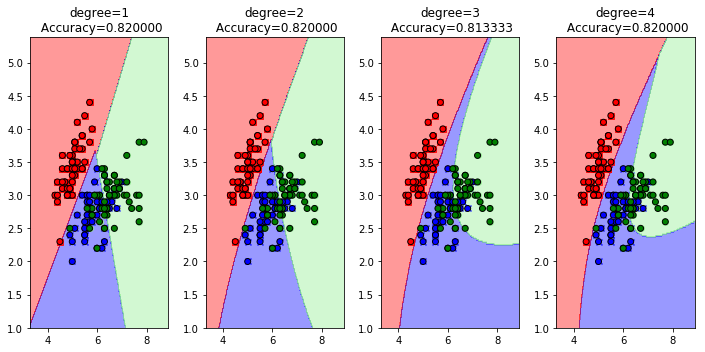

In [6]:
rcParams['figure.figsize'] = 10, 5
def poly_svm_different_degree(drawflag, X, y, d):
    plt.subplot(drawflag) 
    plt.tight_layout()
    colors='rbg'
    #model = svm.SVC(kernel='linear', C=c)
    model = svm.SVC(kernel='poly', C=1, degree=d, gamma=0.7)
    model.fit(X,y)
    predicted = model.predict(X)
    accuracy = model.score(X,y)
    plot_decision_regions(X, y, model)
    plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('degree=%d'%d+'\n Accuracy=%f'%accuracy)
poly_svm_different_degree(141,X,y,1)
poly_svm_different_degree(142,X,y,2)
poly_svm_different_degree(143,X,y,3)
poly_svm_different_degree(144,X,y,4)
plt.show()

# Gamma in Polynominal Kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

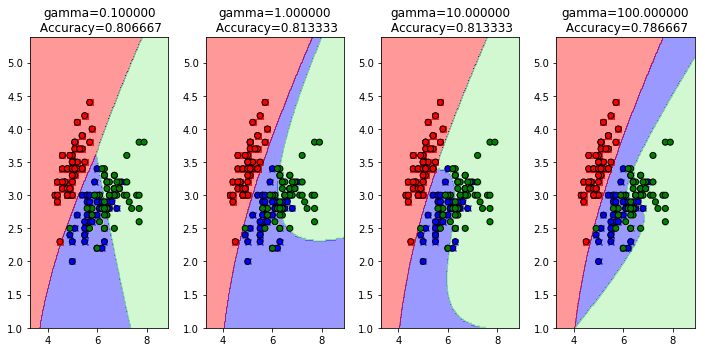

In [7]:
def poly_svm_different_gamma(drawflag, X, y, g):
    plt.subplot(drawflag) 
    plt.tight_layout()
    colors='rbg'
    #model = svm.SVC(kernel='linear', C=c)
    model = svm.SVC(kernel='poly', C=1, degree=3, gamma=g)
    model.fit(X,y)
    predicted = model.predict(X)
    accuracy = model.score(X,y)
    plot_decision_regions(X, y, model)
    plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('gamma=%f'%g+'\n Accuracy=%f'%accuracy)
poly_svm_different_gamma(141,X,y,0.1)
poly_svm_different_gamma(142,X,y,1.0)
poly_svm_different_gamma(143,X,y,10.0)
poly_svm_different_gamma(144,X,y,100.0)
plt.show()

# Gamma in RBF Kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

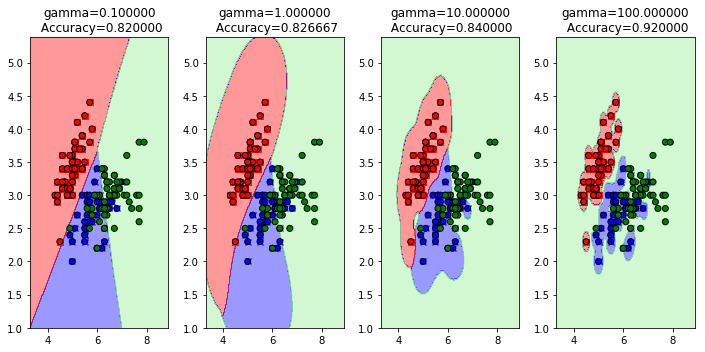

In [8]:
def rbf_svm_different_gamma(drawflag, X, y, g):
    plt.subplot(drawflag) 
    plt.tight_layout()
    colors='rbg'
    #model = svm.SVC(kernel='linear', C=c)
    model = svm.SVC(kernel='rbf', C=1, gamma=g)
    model.fit(X,y)
    predicted = model.predict(X)
    accuracy = model.score(X,y)
    plot_decision_regions(X, y, model)
    plt.scatter(X[:, 0], X[:, 1], c=[ colors[i] for i in y ], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('gamma=%f'%g+'\n Accuracy=%f'%accuracy)
rbf_svm_different_gamma(141,X,y,0.1)
rbf_svm_different_gamma(142,X,y,1.0)
rbf_svm_different_gamma(143,X,y,10.0)
rbf_svm_different_gamma(144,X,y,100.0)
plt.show()

### SVR  [svm for Regression]
```python
from sklearn.svm import SVR
```

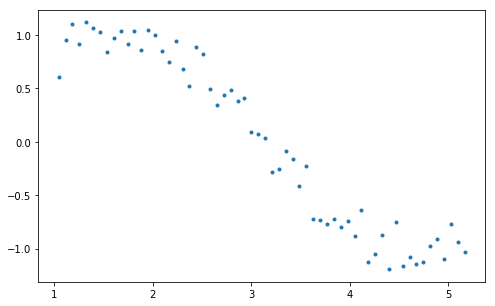

In [9]:
from sklearn.svm import SVR
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
# Generate Sin(x)
X = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(100)  #Setting seed for reproducability
y = np.sin(X) + np.random.normal(0,0.15,len(X))
X = X.reshape(X.shape[0],-1)
#y = y.reshape(y.shape[0],-1)
data = pd.DataFrame(np.column_stack([X,y]),columns=['X','y'])
plt.plot(data['X'],data['y'],'.')
plt.show()

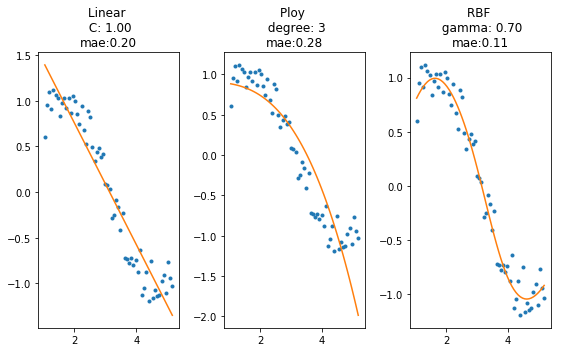

In [10]:
rcParams['figure.figsize'] = 8, 5
def svm_regression(drawflag, X, y, kernel, params, C = 1):
    kernel_dict = {'linear':SVR(kernel='linear', C=params),
                   'poly':SVR(kernel='poly', C=C, degree=params,gamma=0.7),
                   'rbf':SVR(kernel='rbf', C=C, gamma=params)}
    if kernel in kernel_dict:
        model = kernel_dict[kernel]
        model.fit(X, y)
        predicted = model.predict(X)
        mae = metrics.mean_absolute_error(y_pred=predicted, y_true=y)
    plt.subplot(drawflag)
    plt.tight_layout()
    plt.plot(X, y,'.')
    plt.plot(X ,predicted)
    title_dict = {
        'linear':'Linear \n C: %.2f'%params + '\n' + 'mae:%.2f'%mae,
        'poly':'Ploy \n degree: %d'%params + '\n' + 'mae:%.2f'%mae,
        'rbf':'RBF \n gamma: %.2f'%params + '\n' + 'mae:%.2f'%mae,
    }
    plt.title(title_dict[kernel])
    
svm_regression(131,X,y,'linear',1)
svm_regression(132,X,y,'poly',3)
svm_regression(133,X,y,'rbf',0.7)
plt.show()

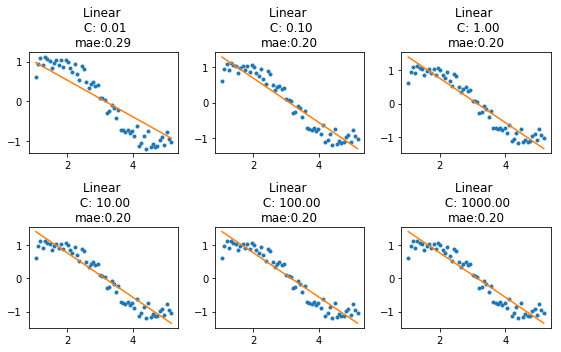

In [11]:
# 觀察C值的變化對預測結果的影響 （黃色線為預測結果）
svm_regression(231,X,y,'linear',0.01)
svm_regression(232,X,y,'linear',0.1)
svm_regression(233,X,y,'linear',1)
svm_regression(234,X,y,'linear',10)
svm_regression(235,X,y,'linear',100)
svm_regression(236,X,y,'linear',1000)
plt.show()

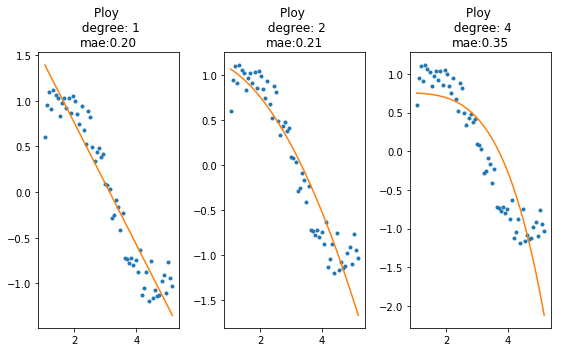

In [12]:
# 觀察degree值的變化對預測結果的影響 （黃色線為預測結果）
svm_regression(131,X,y,'poly',1)
svm_regression(132,X,y,'poly',2)
svm_regression(133,X,y,'poly',4)
plt.show()

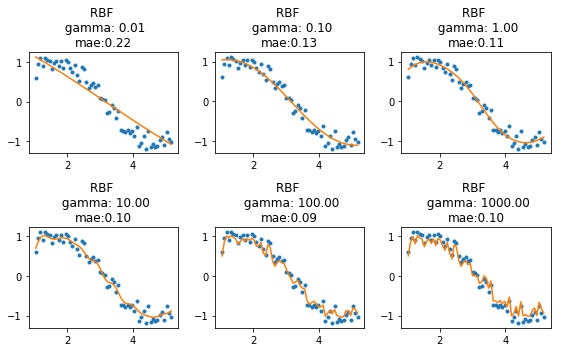

In [13]:
# 觀察C值的變化對預測結果的影響 （黃色線為預測結果）
svm_regression(231,X,y,'rbf',0.01)
svm_regression(232,X,y,'rbf',0.1)
svm_regression(233,X,y,'rbf',1)
svm_regression(234,X,y,'rbf',10)
svm_regression(235,X,y,'rbf',100)
svm_regression(236,X,y,'rbf',1000)
plt.show()

# 數字辨識

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.model_selection import train_test_split
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

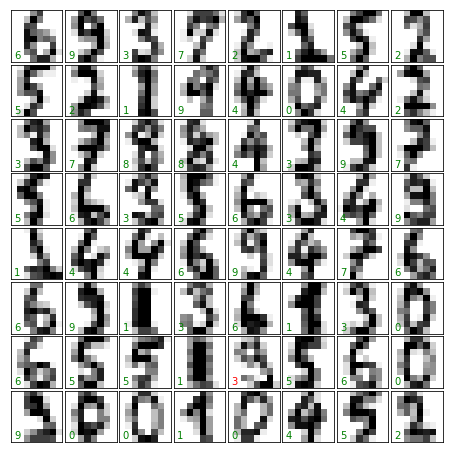

In [15]:
model = svm.SVC(kernel='linear', C=1)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print(metrics.classification_report(y_true=y_test,y_pred=predicted))
print("%s"%metrics.confusion_matrix(y_true=y_test, y_pred=predicted))
print("accuravy=%f"%metrics.accuracy_score(y_true=y_test, y_pred=predicted))
print("r2=%f"%metrics.r2_score(y_true=y_test, y_pred=predicted))

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == y_test[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [16]:
matches = (predicted == y_test)
print('accuracy=%.3f'%(matches.sum()/float(len(matches))))

accuracy=0.982


# boston房價

In [17]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

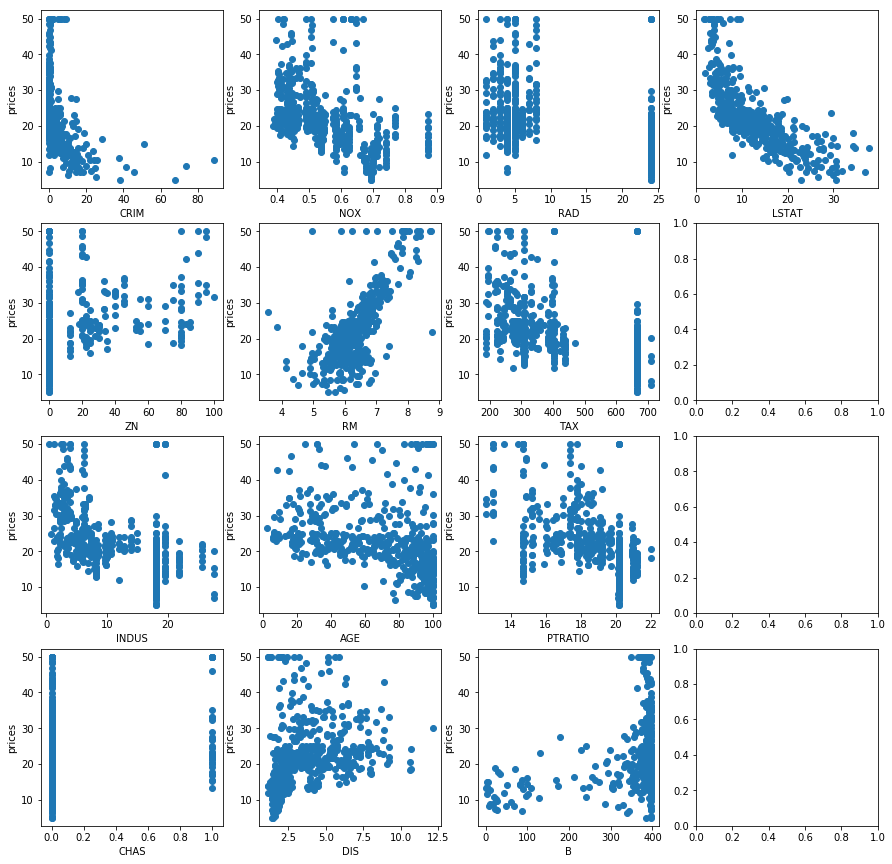

'\n- CRIM     per capita crime rate by town\n- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n- INDUS    proportion of non-retail business acres per town\n- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n- NOX      nitric oxides concentration (parts per 10 million)\n- RM       average number of rooms per dwelling\n- AGE      proportion of owner-occupied units built prior to 1940\n- DIS      weighted distances to five Boston employment centres\n- RAD      index of accessibility to radial highways\n- TAX      full-value property-tax rate per $10,000\n- PTRATIO  pupil-teacher ratio by town\n- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n- LSTAT    % lower status of the population\n'

In [18]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
import math
fig, axes = plt.subplots(4,4)
for i in range(13):
    x_f = i%4
    y_f = math.floor((i)/4)
    axes[x_f, y_f].scatter(data.data[:,i], data.target) 
    axes[x_f, y_f].set_xlabel(features[i])
    axes[x_f, y_f].set_ylabel('prices')
plt.show()
"""
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
"""

### 在沒有做任何new feature生成的情況下，是否可以讓SVR的performance接近linear regression?

In [19]:
from sklearn.model_selection import train_test_split
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42, shuffle=True)

In [4]:
model = svm.SVR(kernel='poly',gamma=1e-2,degree=2 , C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

TypeError: __init__() got an unexpected keyword argument 'probability'

RMS: 4.034779437991794
R2:0.69


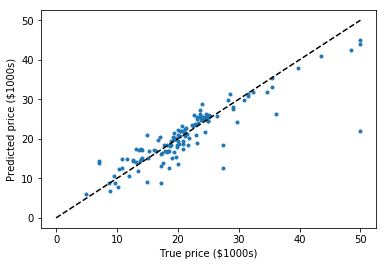

In [27]:
rcParams['figure.figsize'] = 6, 4
#plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred,'.')
plt.plot([0, 50], [0, 50],'--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test) ** 2)))
print('R2:%.2f'%metrics.r2_score(y_pred, y_test))
plt.show()